In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Credit Card Fraud  Detection

In [26]:
data = pd.read_csv('creditcard.csv')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### I'll continuously call this functions

In [28]:
def predict(X, beta):
    return np.dot(X, beta)
def cost_function(X, y, beta):
    m = len(y)
    predictions = predict(X, beta)
    squared_errors = (predictions - y) ** 2
    return np.sum(squared_errors) / (2 * m)
def gradient_descent(X, y, learning_rate=0.001, num_iterations=1000):
    m, n = len(y), X.shape[1]
    beta = np.random.randn(n)  # Initialize beta with small random values
    for _ in range(num_iterations):
        gradients = np.dot(X.T, np.dot(X, beta) - y) / m
        beta -= learning_rate * gradients
    return beta
def plot_regression_results(y_true, y_pred):
    plt.scatter(y_true, y_pred)
    plt.plot([min(y_true), max(y_true)], [min(y_pred), max(y_pred)], color='red')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("True vs. Predicted Values")
    plt.show()
def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

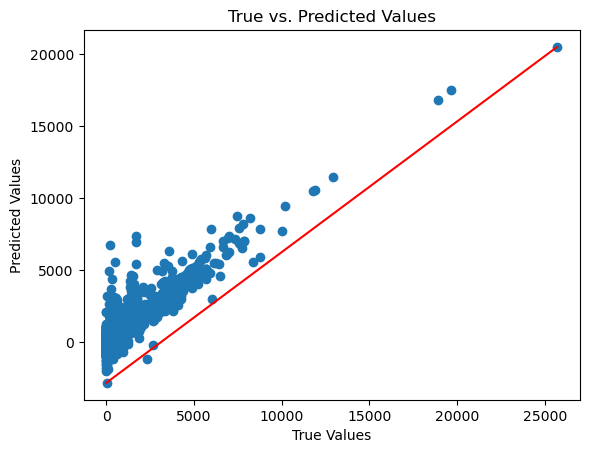

In [29]:
X = data.drop('Amount', axis=1).values
y = data['Amount'].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept to scaled features
X_scaled_with_intercept = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Apply gradient descent with scaled features
beta = gradient_descent(X_scaled_with_intercept, y, learning_rate=0.01, num_iterations=1000)

# Make predictions using scaled features
predictions = predict(X_scaled_with_intercept, beta)

# Plot regression results
plot_regression_results(y, predictions)

In [30]:
pred_true = pd.DataFrame({'True_Label': y, 'Predicted_Label': predictions})

In [31]:
pred_true

,True_Label,Predicted_Label
0,149.62,139.993082
1,2.69,11.434165
2,378.66,412.212060
3,123.50,139.083116
4,69.99,85.171111
...,...,...
284802,0.77,-308.730798
284803,24.79,36.573812
284804,67.88,67.126355
284805,10.00,21.403587


In [32]:
accuracy = r_squared(y, predictions) * 100
print(accuracy)

91.74955621241267


## Suicide Death Rates

In [34]:
suicide_data = pd.read_csv('Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv')

In [35]:
suicide_data.isnull().sum()

INDICATOR            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE           906
FLAG              5484
dtype: int64

In [36]:
suicide_data = suicide_data.drop('FLAG',axis = 1)

In [37]:
suicide_data.isnull().sum()

INDICATOR           0
UNIT                0
UNIT_NUM            0
STUB_NAME           0
STUB_NAME_NUM       0
STUB_LABEL          0
STUB_LABEL_NUM      0
YEAR                0
YEAR_NUM            0
AGE                 0
AGE_NUM             0
ESTIMATE          906
dtype: int64

In [38]:
suicide_data = suicide_data.dropna()

In [39]:
suicide_data.isnull().sum()

INDICATOR         0
UNIT              0
UNIT_NUM          0
STUB_NAME         0
STUB_NAME_NUM     0
STUB_LABEL        0
STUB_LABEL_NUM    0
YEAR              0
YEAR_NUM          0
AGE               0
AGE_NUM           0
ESTIMATE          0
dtype: int64

In [40]:
suicide_data

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1950,1,All ages,0.0,13.2
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1960,2,All ages,0.0,12.5
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1970,3,All ages,0.0,13.1
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1980,4,All ages,0.0,12.2
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1981,5,All ages,0.0,12.3
...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0,1.3
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0,4.1
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0,4.4
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0,3.2


In [41]:
categorical_columns = suicide_data.select_dtypes(include='object').columns

In [42]:
categorical_columns

Index(['INDICATOR', 'UNIT', 'STUB_NAME', 'STUB_LABEL', 'AGE'], dtype='object')

In [43]:
suicide_df = pd.get_dummies(suicide_data, columns=categorical_columns, drop_first=True)

In [45]:
suicide_df

,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE,"UNIT_Deaths per 100,000 resident population, crude",STUB_NAME_Sex,STUB_NAME_Sex and age,...,AGE_25-44 years,AGE_35-44 years,AGE_45-54 years,AGE_45-64 years,AGE_55-64 years,AGE_65 years and over,AGE_65-74 years,AGE_75-84 years,AGE_85 years and over,AGE_All ages
0,1,0,0.000,1950,1,0.0,13.2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0.000,1960,2,0.0,12.5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0.000,1970,3,0.0,13.1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0.000,1980,4,0.0,12.2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0.000,1981,5,0.0,12.3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,2,11,7.225,2018,42,5.0,1.3,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6386,2,11,7.232,2018,42,2.0,4.1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6387,2,11,7.233,2018,42,3.0,4.4,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6388,2,11,7.234,2018,42,4.0,3.2,1,0,0,...,0,0,0,1,0,0,0,0,0,0


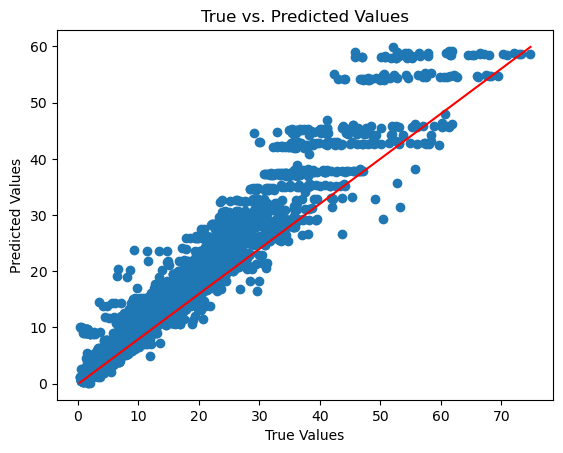

In [46]:
X = suicide_df.drop('ESTIMATE', axis=1).values
y = suicide_df['ESTIMATE'].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept to scaled features
X_scaled_with_intercept = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Apply gradient descent with scaled features
beta = gradient_descent(X_scaled_with_intercept, y, learning_rate=0.01, num_iterations=1000)

# Make predictions using scaled features
predictions = predict(X_scaled_with_intercept, beta)

# Plot regression results
plot_regression_results(y, predictions)

In [47]:
pred_true = pd.DataFrame({'True_Label': y, 'Predicted_Label': predictions})

In [48]:
pred_true

,True_Label,Predicted_Label
0,13.2,12.781340
1,12.5,12.697145
2,13.1,12.612951
3,12.2,12.528756
4,12.3,12.501367
...,...,...
5479,1.3,4.592068
5480,4.1,5.990017
5481,4.4,5.897601
5482,3.2,6.030810


In [50]:
accuracy = r_squared(y, predictions) * 100
print(accuracy)

93.84681606558489


## Weather Condition In World War II

In [70]:
weather_data = pd.read_csv('Summary of Weather.csv', low_memory = False)

In [71]:
weather_data

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
weather_data = weather_data.drop('Date', axis =1)

In [73]:
weather_data.isnull().sum()

STA                 0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [74]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Precip       119040 non-null  object 
 2   WindGustSpd  532 non-null     float64
 3   MaxTemp      119040 non-null  float64
 4   MinTemp      119040 non-null  float64
 5   MeanTemp     119040 non-null  float64
 6   Snowfall     117877 non-null  object 
 7   PoorWeather  34237 non-null   object 
 8   YR           119040 non-null  int64  
 9   MO           119040 non-null  int64  
 10  DA           119040 non-null  int64  
 11  PRCP         117108 non-null  object 
 12  DR           533 non-null     float64
 13  SPD          532 non-null     float64
 14  MAX          118566 non-null  float64
 15  MIN          118572 non-null  float64
 16  MEA          118542 non-null  float64
 17  SNF          117877 non-null  object 
 18  SND          5563 non-nu

In [75]:
categorical_columns = weather_data.select_dtypes(include='object').columns

In [76]:
categorical_columns

Index(['Precip', 'Snowfall', 'PoorWeather', 'PRCP', 'SNF', 'TSHDSBRSGF'], dtype='object')

In [77]:
weather_df = pd.get_dummies(weather_data, columns=categorical_columns, drop_first=True)

In [80]:
weather_df = weather_df.dropna(axis = 1)

In [81]:
weather_df

,STA,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,Precip_0.254,Precip_0.508,Precip_0.762,...,TSHDSBRSGF_101000,TSHDSBRSGF_1010001000,TSHDSBRSGF_1010001001,TSHDSBRSGF_101001,TSHDSBRSGF_11,TSHDSBRSGF_11 1,TSHDSBRSGF_11 1,TSHDSBRSGF_1100000,TSHDSBRSGF_1101000,TSHDSBRSGF_1101001
0,10001,25.555556,22.222222,23.888889,42,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001,28.888889,21.666667,25.555556,42,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10001,26.111111,22.222222,24.444444,42,7,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10001,26.666667,22.222222,24.444444,42,7,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10001,26.666667,21.666667,24.444444,42,7,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,20501,29.444444,22.222222,25.555556,42,10,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,20501,29.444444,23.888889,26.666667,42,10,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,20501,29.444444,24.444444,26.666667,42,10,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,20501,27.222222,22.222222,24.444444,42,10,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


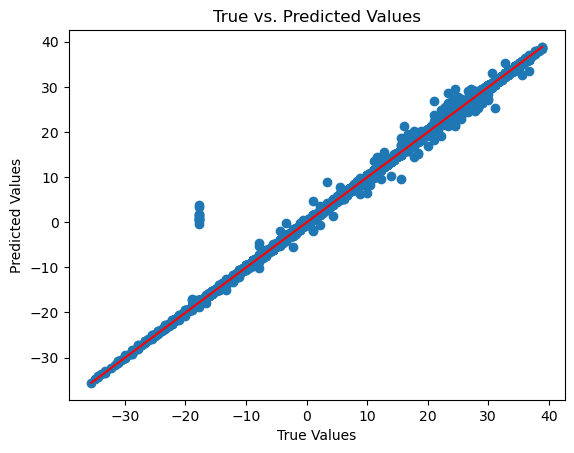

In [82]:
X = weather_df.drop('MeanTemp', axis=1).values
y = weather_df['MeanTemp'].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept to scaled features
X_scaled_with_intercept = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Apply gradient descent with scaled features
beta = gradient_descent(X_scaled_with_intercept, y, learning_rate=0.01, num_iterations=1000)

# Make predictions using scaled features
predictions = predict(X_scaled_with_intercept, beta)

# Plot regression results
plot_regression_results(y, predictions)

In [83]:
pred_true = pd.DataFrame({'True_Label': y, 'Predicted_Label': predictions})

In [84]:
pred_true

,True_Label,Predicted_Label
0,23.888889,24.062244
1,25.555556,25.393654
2,24.444444,24.320300
3,24.444444,24.576536
4,24.444444,24.370133
...,...,...
49995,25.555556,25.751573
49996,26.666667,26.649178
49997,26.666667,26.948515
49998,24.444444,24.658214


In [85]:
accuracy = r_squared(y, predictions) * 100
print(accuracy)

99.84336424193243
